# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

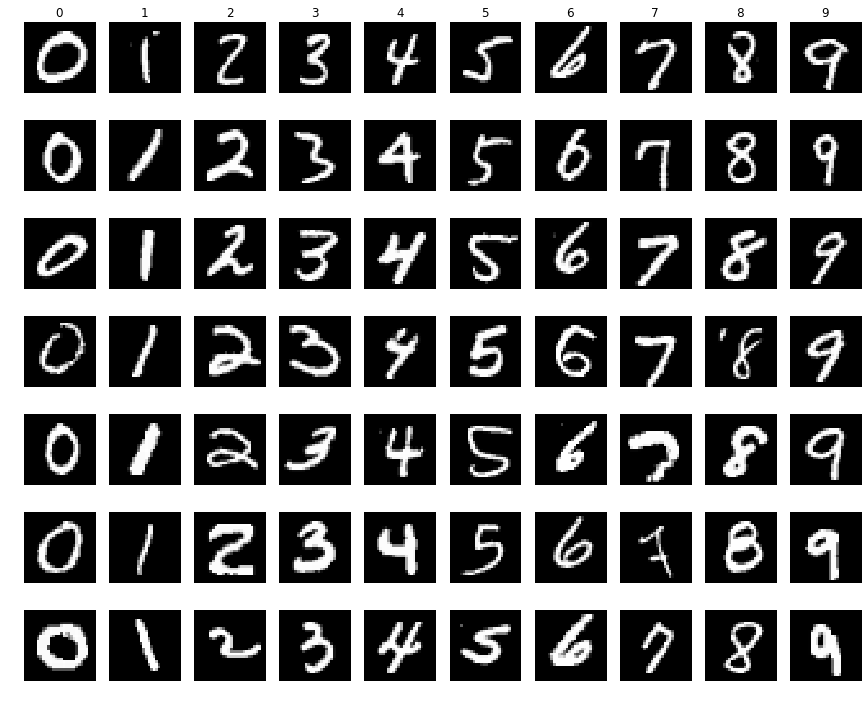

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in xrange(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [5]:
# for i in np.arange(X_train.shape[1]):
#     X_train[:, i] = (X_train[:, i] - np.min(X_train[:, i])) / (np.max(X_train[:, i]) - np.min(X_train[:, i]))
#     X_test[:, i] = (X_test[:, i] - np.min(X_test[:, i])) / (np.max(X_test[:, i]) - np.min(X_test[:, i]))
# X_train_feats = X_train
# X_test_feats = X_test
X_train_feats = np.sign(X_train) # choose and extract features
X_test_feats = np.sign(X_test) # choose and extract features

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_feats, y_train)
pre=clf.predict(X_test_feats)
print "The accuracy socre is ", np.mean(y_test == pre)

The accuracy socre is  0.990214285714


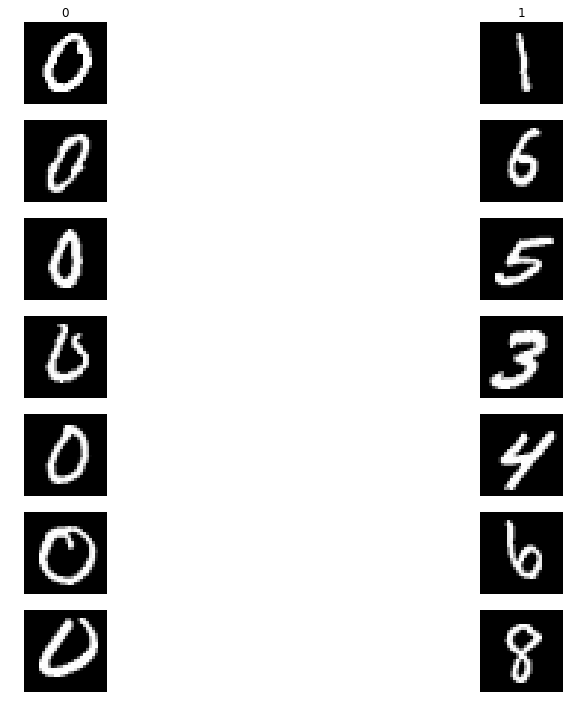

In [7]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 0.1,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.696418
iteration 100 / 500: loss 0.054598
iteration 200 / 500: loss 0.119558
iteration 300 / 500: loss 0.066029
iteration 400 / 500: loss 0.008974


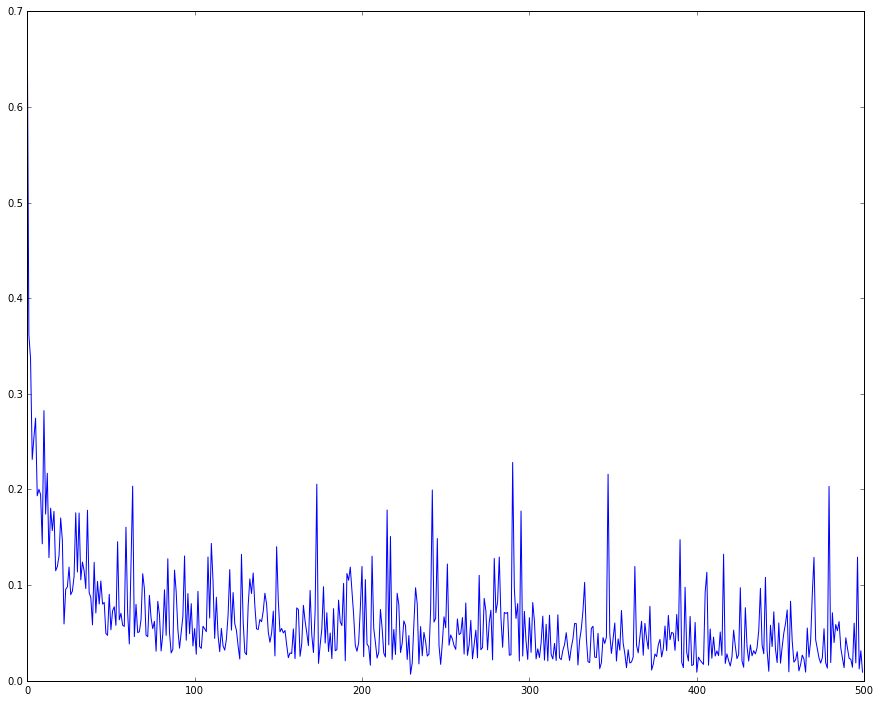

In [9]:
plt.plot(loss_history)

In [10]:
y_test_pred = classifier.predict(X_test_feats)
print "The accuracy socre is ", np.mean(y_test == y_test_pred)

The accuracy socre is  0.986642857143


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [11]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
TP = FP = TN = FN = 0.
for i in np.arange(len(y_test)):
    if y_test_pred[i] == y_test[i] and y_test[i] == 1:
        TN = TN + 1
    elif y_test_pred[i] != y_test[i] and y_test[i] == 1:
        FN = FN + 1
    elif y_test_pred[i] == y_test[i] and y_test[i] == 0:
        TP = TP + 1
    else:
        FP = FP + 1

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print precision
print recall
print 'F1:', precision*recall*2/(precision+recall)

0.905740609497
0.959459459459
F1: 0.931826467371


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [12]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [13]:
X_train_feats = np.sign(X_train) # choose and extract features
X_test_feats = np.sign(X_test) # choose and extract features

In [14]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
loss = classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 0.1,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.692574
iteration 100 / 500: loss 0.054723
iteration 200 / 500: loss 0.033177
iteration 300 / 500: loss 0.060301
iteration 400 / 500: loss 0.068658
iteration 0 / 500: loss 0.692546
iteration 100 / 500: loss 0.047902
iteration 200 / 500: loss 0.026531
iteration 300 / 500: loss 0.036805
iteration 400 / 500: loss 0.010987
iteration 0 / 500: loss 0.696857
iteration 100 / 500: loss 0.172487
iteration 200 / 500: loss 0.080707
iteration 300 / 500: loss 0.108878
iteration 400 / 500: loss 0.154862
iteration 0 / 500: loss 0.686973
iteration 100 / 500: loss 0.112187
iteration 200 / 500: loss 0.064864
iteration 300 / 500: loss 0.084895
iteration 400 / 500: loss 0.041986
iteration 0 / 500: loss 0.693933
iteration 100 / 500: loss 0.096746
iteration 200 / 500: loss 0.141717
iteration 300 / 500: loss 0.068594
iteration 400 / 500: loss 0.141569
iteration 0 / 500: loss 0.690431
iteration 100 / 500: loss 0.066119
iteration 200 / 500: loss 0.169460
iteration 300 / 500: loss 0.1632

In [15]:
# you may change your code in function `predict`
y_test_pred = classifier.predict(X_test_feats)
print "The accruacy socre is ", np.mean(y_test == y_test_pred)

The accruacy socre is  0.883357142857
